In [1]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

%matplotlib inline

import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
root = nc.Dataset('prod_latlon_merged_2017.nc')

In [3]:
time = root.variables['time']
latitude = root.variables['latitude']
longitude = root.variables['longitude']
ice_area = root.variables['ice_area']

In [ ]:
# No need to run this section

In [ ]:
root.variables

In [ ]:
root.dimensions

In [ ]:
time

In [ ]:
latitude[:]

In [ ]:
longitude[:]

In [ ]:
time[:]

In [ ]:
ice_area

In [ ]:
for name in root.ncattrs():
    print(name)

In [ ]:
print(ice_area.units)
print(ice_area.shape)
print(ice_area.dimensions)

# Ice Area Data

In [ ]:
# data has nan as well as 0 values
ice_area[0,75,:]

## Overview
### Run from here
time is 1 to 12
latitude is -90 to -40  
longitude - 0 to 360 with 2 degrees precision  
    I am subtracting 180 from this to get the correct longitude? will check the documentation on this
B30 is currently at -63, -141
A lot of the data is nan.

In [28]:
# Get a single months worth of ice data
print(ice_area[:,:,:].data.shape)
ice2d = ice_area[0,:,:].data
ice2d = np.swapaxes(ice2d, 0, 1)
print(ice2d.shape)
#ice2d

(12, 181, 51)
(51, 181)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


### Summing code - not necessary to run this every time

In [5]:
# Create a loop for each dimension
# Sum over the 12 months and add final result to summing array
# Will probably have to deal with nan

shape = ice_area[0].data.shape
print(shape)

ice2dSum  = np.zeros((shape[0],shape[1]), dtype=float)
ice2dSum.fill(np.nan)
print(ice2dSum.shape)

for lat in range(0, shape[0] - 1):
    for long in range(1, shape[1] - 1):
        for month in range(0,11):
            num = ice_area[month, lat, long]
            
            if not np.isnan(num):
                if np.isnan(ice2dSum[lat, long]):
                    ice2dSum[lat, long] = 0.0  # can't add nan to a number
                    
                ice2dSum[lat, long] += num

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


(181, 51)
(181, 51)


In [6]:
# Tests for the summing code
# 20,20 is a good check of the nan/0 code
# 21,24 is a good check of non zero/nan code

lat = 20
long = 20

for month in range(0,11):
    print(ice_area[month, lat, long])
    
ice2dSum[lat, long]

0.0
0.0
0.0
0.0
0.0
nan
nan
nan
nan
nan
nan


0.0

In [7]:
ice2dSum = np.swapaxes(ice2dSum, 0, 1)

### Plot onto basemap

In [8]:
lonvals = longitude[:].data
latvals = latitude[:].data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  


In [9]:
# Useful south pole stereographic link
#https://stackoverflow.com/questions/45302485/matplotlib-focus-on-specific-lon-lat-using-spstere-projection

def showMap(ice2d, dfCurrent=None):
    # create a map
    plt.figure(figsize=(10,10))
    m = Basemap(projection = 'spstere', boundinglat = -50, lon_0 = 180)
    sea_color = 'lightcyan'

    # set the features
    m.drawcoastlines()
    m.drawmapboundary(fill_color = sea_color)
    m.drawparallels(np.arange(-80, 81, 15))
    m.drawmeridians(np.arange(-180, 180, 15), labels=[True, False, False, False])

    x, y = m(*np.meshgrid(lonvals, latvals))

    # make filled contour plot
    m.contourf(x, y, ice2d, 30, cmap = plt.cm.jet)
    cbar = plt.colorbar(orientation="vertical")
    cbar.set_label('Ice volume (gigatons)')

    if dfCurrent is not None:
        x, y = m(dfCurrent['lon'].values, dfCurrent['lat'].values)
        m.scatter(x, y, 20, marker='o', color='red')

    plt.show()

In [11]:
dfCurrent = pd.read_csv('CurrentIcebergs.csv')

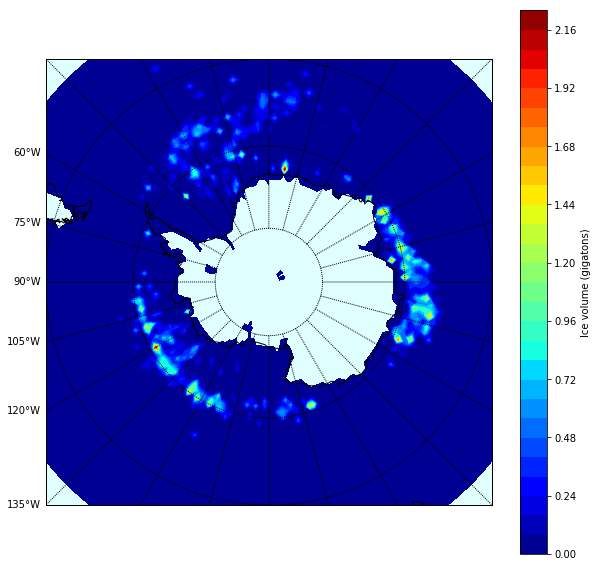

In [29]:
showMap(ice2d)

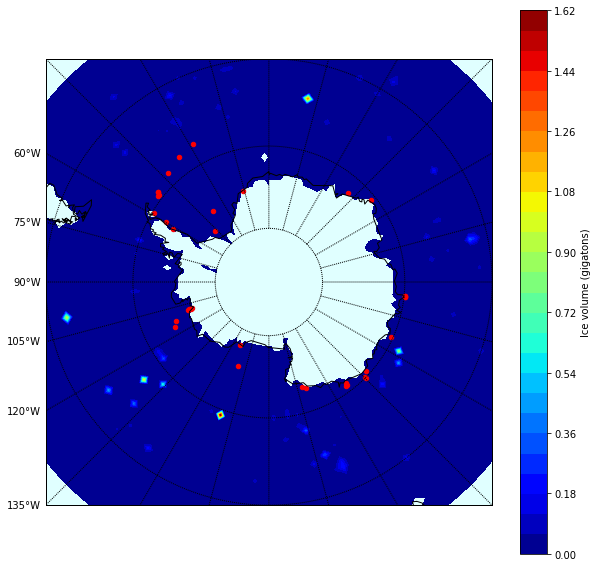

In [20]:
showMap(ice2d, dfCurrent)

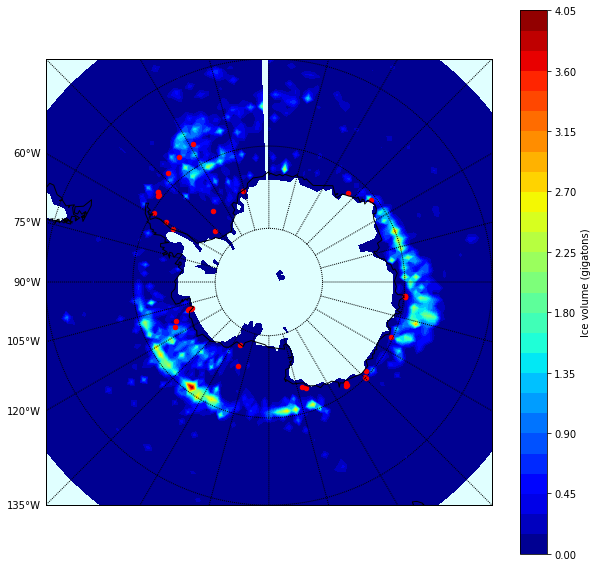

In [12]:
showMap(ice2dSum, dfCurrent)

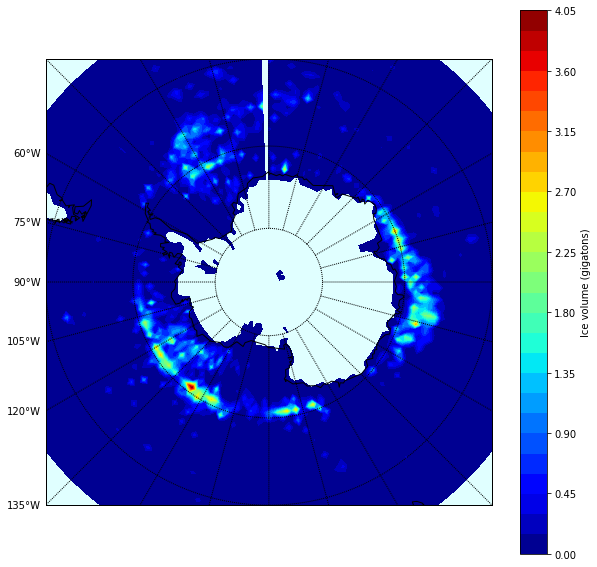

In [22]:
showMap(ice2dSum)